In [1]:
import pandas as pd

# Define the column names based on the dataset description
column_names = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols",
                "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", "Color Intensity", "Hue",
                "OD280/OD315 of Diluted Wines", "Proline"]

# Load the data file into a Pandas dataframe
data = pd.read_csv("wine.data", names=column_names)

# Display the first few rows of the dataframe
print(data.head())


   Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of Diluted Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [2]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop("Class", axis=1)
y = data["Class"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


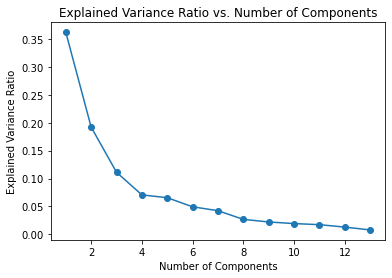

In [3]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components
pca = PCA(n_components=None)

# Fit PCA on the scaled data
pca.fit(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()


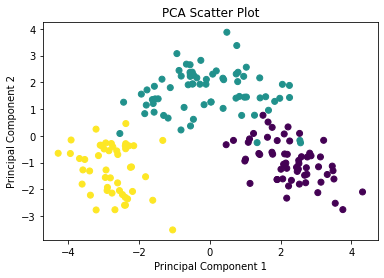

In [4]:
# Transform data to the chosen number of components
num_components = 2  # Choose based on the explained variance plot
X_pca = pca.transform(X_scaled)[:, :num_components]

# Create a scatter plot of PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()


In [5]:
from sklearn.cluster import KMeans

# Initialize KMeans with the chosen number of clusters
num_clusters = 3  # You can choose based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans on the PCA-transformed data
cluster_labels = kmeans.fit_predict(X_pca)

# Add cluster labels to the original dataframe
data['Cluster'] = cluster_labels


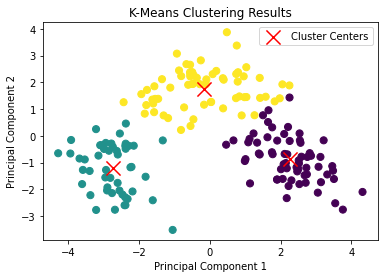

In [6]:
import matplotlib.pyplot as plt

# Scatter plot showing cluster results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()
